# Computational Exercise 1:  Linear Variational Principle
We will apply the Linear Variational Method to the particle in a box of length $10$ atomic unitw 
with a delta function potential centered at $x=5$ atomic units.  In particular, we will optimize
the trial wavefunction given by 
\begin{equation}
\Phi(x) = \sum_{i=1}^N c_i \psi_i(x)
\end{equation}
where the coefficients $c_i$ are real numbers
and $\psi_i(x)$ are the energy eigenfunctions of the particle in a box with no potential:
\begin{equation}
\psi_n(x) = \sqrt{\frac{2}{10} } {\rm sin}\left(\frac{n \pi x}{10} \right).
\end{equation}

We will seek to minimize the energy functional through the expansion coefficients, where the
energy functional can be written as
\begin{equation}
E[\Phi(x)] = \frac{\int_0^{\infty} \Phi^* (x) \: \hat{H} \: \Phi(x) dx }{\int_0^{\infty} \Phi^* (x) \: \Phi(x) dx }.
\end{equation}


The Hamiltonian operator in the box is given by 
\begin{equation}
\hat{H} = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + \delta(x-5);
\end{equation}
in natural units, $\hbar$ and $m$ are equal to 1.

As we saw in class, $E[\Phi(x)]$ can be expanded as
\begin{equation}
E[\Phi(x)] \sum_{i=1}^N \sum_{j=1}^N c_i c_j S_{ij} = \sum_{i=1}^N \sum_{j=1}^N c_i c_j H_{ij}
\end{equation}
where 
\begin{equation}
S_{ij} = \int_0^L \psi_i(x) \psi_j(x) dx = \delta_{ij}
\end{equation}
and
\begin{equation}
H_{ij} = \int_0^L \psi_i(x) \hat{H} \psi_j(x) dx. 
\end{equation}

### Questions Part 1:
1. Work out a general expression for the integrals $H_{ij}$
2. Write a python function that takes the indices $i$ and $j$ and returns
the value of the integral $H_{ij}$.  Skeleton code for this function follows.
3. Show that differentiating the energy functional with respect to all coefficients and setting the derivative to zero results in the following set of equations:
\begin{equation}
\sum_i^N H_{ik} c_i = E[\Phi(x)] c_k
\end{equation}
This can be written as an eigenvalue equation
\begin{equation}
{\bf H} {\bf c} = E {\bf c},
\end{equation}
where ${\bf H}$ is the matrix whose elements are given by $H_{ij}$ and ${\bf c}$ is the vector of coefficients.


In [1]:
import numpy as np
### Function to return integrals involving Hamiltonian and basis functions
def H_ij(i, j):
    ### if i==j, you need to worry about kinetic and potential
    ### if i!=j, you only need to worry about potential...
    ### so check if i==j and handle the two cases accordingly
    ### store the result in the variable called ham_int
    ham_int = 0
    if i==j:
        ham_int = j**2 * np.pi**2/(2 * L**2) + 2/L * np.sin(i * np.pi * 5 / L) * np.sin(j * np.pi * 5 / L)
    else:
        ham_int = 2/L * np.sin(i * np.pi * 5 / L) * np.sin(j * np.pi * 5 / L)
        ### code to evaluate H_ij here!
    return ham_int

In [34]:
L = 10
print(H_ij(1, 1))
print(H_ij(1,5))

0.2493480220054468
0.2


Create an array called $H_mat$ that can be used to store the Hamiltonian matrix elements.  We can start by considering a trial wavefunction that is an expansion of the first 3 PIB energy eigenfunctions, so our Hamiltonian in this case should be a 3x3 matrix.

You can use two nested $for$ loops along with your $H_{ij}$ function to fill out the values of this matrix.

In [47]:
H_mat = np.zeros((3,3))
print(H_mat)
### loop over indices of the basis you are expanding in
### and compute and store the corresponding Hamiltonian matrix elements
for i in range(1,4):
    for j in range(1,4):
        H_mat[i-1,j-1] = H_ij(i, j)

### Print the resulting Hamiltonian matrix
print(H_mat)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 2.49348022e-01  2.44929360e-17 -2.00000000e-01]
 [ 2.44929360e-17  1.97392088e-01 -2.44929360e-17]
 [-2.00000000e-01 -2.44929360e-17  6.44132198e-01]]


Before systematically identifying the optimal coefficients, it is instructive to try a few "trial" wavefunctions "by hand".  A few suggestions include:
\begin{equation}
{\bf c} = \left(1, 0, 0 \right) \;  {\bf c} = \left(0, 1, 0 \right) \: {\bf c} = \left(0, 0, 1 \right)
\end{equation}
\begin{equation}
{\bf c} = \left(\sqrt{1/2}, \sqrt{1/2}, 0 \right) \;  {\bf c} = \left(0, \sqrt{1/2}, \sqrt{1/2} \right) \: {\bf c} = \left(\sqrt{1/2}, 0, \sqrt{1/2} \right)
\end{equation}

In Matrix form, the energy functional can be computed as follows:
\begin{equation}
E = {\bf c}^t {\bf H} {\bf c}
\end{equation}
where ${\bf c}^t$ is just the transpose of ${\bf c}$.  Using numpy, this can be done with the Hamiltonian matrix defined abouve and a vector ${\bf c} = \left(1, 0, 0 \right)$ as follows: 

In [53]:
### create an empty numpy array for the c vector
c = np.zeros(3)
### assign c vector to be (1, 0, 0)
c = np.array([-9.22618887e-01,  8.56454538e-17, -3.85712834e-01])
print("This is the c vector")
print(c)

### compute H_mat * c and store it to a new array called Hc
Hc = np.dot(H_mat,c)
print("This is H * the c vector")
print(Hc -  0.16573541893898724*c)

print("This is c transpose")
print(np.transpose(c))
### compute c^t * Hc and store it to a variable E
E = np.dot(np.transpose(c),Hc)

### print the result
print("This is the energy functional value!")
print(E)

norm = np.dot(np.transpose(c),c)
print(norm)


This is the c vector
[-9.22618887e-01  8.56454538e-17 -3.85712834e-01]
This is H * the c vector
[ 1.96503092e-11 -1.04391558e-17 -4.70031375e-11]
This is c transpose
[-9.22618887e-01  8.56454538e-17 -3.85712834e-01]
This is the energy functional value!
0.16573541909833028
1.0000000009614305


Continue evaluating the energy of different trial wavefunctions by changing the values of the ${\bf c}$ vector and repeating the calculation above.  Does increasing the contribution of excited states impact the energy as you expect?  Explain.

Finally, to get the optimal values of the ${\bf c}$ vector, we can find the set of vectors (there will be 3) that satisfy the eigenvalue equation we wrote before.  We can use the $eig$ function of numpy to do this in one line:

In [64]:
### compute eigenvalues and eigenvectors of H_mat
### store eigenvalues to E_opt and eigenvectors to c_opt
E_opt, c_opt = np.linalg.eig(H_mat)

### print lowest eigenvalues corresponding to the 
### variational estimate of the ground state energy
print(E_opt)

### print coefficients that define the trial wavefunction with the lowest eigenvalue
### which corresponds to the variational estimate of the ground state wavefunction
print(c_opt[:,0])

[0.16573542 0.7277448  0.19739209]
[-9.22618887e-01  8.56454538e-17 -3.85712834e-01]


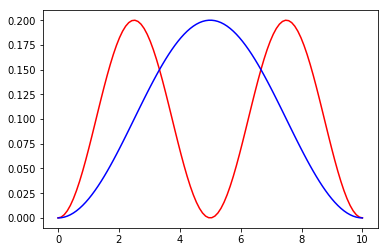

In [65]:
from matplotlib import pyplot as plt
def psi_n(n, x):
    return np.sqrt(2/L) * np.sin(n * np.pi * x/L)

x = np.linspace(0,L,100)
m = 2
phi = c_opt[0,m]*psi_n(1,x) + c_opt[1,m]*psi_n(2,x) + c_opt[2,m]*psi_n(3,x)
psi1 = psi_n(1,x)
plt.plot(x, phi*phi, 'red', x, psi1*psi1, 'blue')
plt.show()

### Questions Part 2:
1.  Is the energy you calculated above higher or lower than the ground state energy of the ordinary particle in a box system (without the delta function potential)?
2.  Why do you think mixing in functions that correspond to excited states in the ordinary particle in a box system actually helped to improve (i.e. lower) your energy in the system with the delta function potential?
3.  Increase the number of basis functions to 6 (so that ${\bf H}$ is a 6x6 matrix and ${\bf c}$ is a vector with 6 entries) and repeat your calculation of the variational estimate of the ground state energy.  Does the energy improve (lower) compared to what it was when 3 basis functions were used?